# Part I - Prosper Loan Data Exploration 
## by Donna Fedha Obong'o

## Introduction
> The dataset being explored is a loan dataset containing  113,937 loans(rows) and with 81 variables(columns),some of these variables are Borrower rate(Interest rate),term(how long the loan has been taken for), prosper score also known as the risk rating and more. It is important to note that each loan has a listing key which is a unique key for each listing, same value as the 'key' used in the listing object in the API. 




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the dataset
Loans= pd.read_csv('prosperLoanData.csv')

In [3]:
#general properties of the dataset

print(Loans.shape) #(rows, columns)

print(Loans.info()) #total of the non-null rows and their datatypes per column

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

In [4]:
#display the dataset in a dataframe and make sure it displays all 81 columns
pd.set_option('display.max_columns', 100)
Loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
#converting multiple columns to datetime
Loans[['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']] =Loans[['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

### What is the structure of your dataset?

> 113,937 rows and 81 columns.

### What is/are the main feature(s) of interest in your dataset?

  + **Term** : The length of the loan expressed in months.
  + **LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
  + **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.
  + **BorrowerRate**: The Borrower's interest rate for this loan. 
  + **LenderYield**: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
  + **EstimatedEffectiveYield**: Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.
  + **ProsperRating (numeric)**: The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
  + **ProsperScore**: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
  + **ListingCategory**:	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
  + **BorrowerState**: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
  + **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
  + **EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.
  + **IsBorrowerHomeowner**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
  + **AvailableBankcardCredit**: The total available credit via bank card at the time the credit profile was pulled.
  + **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
  + **IncomeRange**: The income range of the borrower at the time the listing was created.
  + **LoanOriginalAmount**: The origination amount of the loan.
  + **LoanOriginationDate**: The date the loan was originated.
  + **LP_NetPrincipalLoss**: The principal that remains uncollected after any recoveries.
  
  
  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Loan status:whether the loan has been repaid or not and how it affects the return and loss  
> Employment status: how does it affect the loan status  
> Borrower rate and borrower APR: how it's affected and how it affects the other variables especially the numeric ones  
> Term: check how people choose the loan term they'll take, could it affect the loan amount?

## Univariate Exploration

#### How long do most people opt to take loans for?

In [6]:
Loans.Term.describe()

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

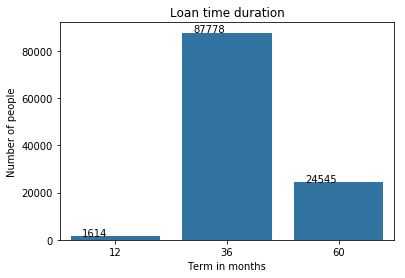

In [7]:
#term column shows the time duration in which people take loans
plt.figure(figsize=[6,4])
base_color = sb.color_palette()[0]
ax= sb.countplot(data= Loans, x='Term', color= base_color)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xlabel('Term in months')
plt.ylabel('Number of people')
plt.title('Loan time duration');

**Observation**  
In the above visualization we can note that a higher number of people take loans for 36 months which is neither short term(12 months) nor long term(60 months)

#### What is the highest current status?

In [8]:
#orderd categorical data type
status_order= ['Cancelled', 'Chargedoff', 'Completed','Current', 'Defaulted', 'FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)',
               'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']

#categories and order'
status = pd.api.types.CategoricalDtype(ordered = True, categories = status_order)

#LoanStatus column to  ordered categorical
Loans['LoanStatus'] = Loans['LoanStatus'].astype(status);


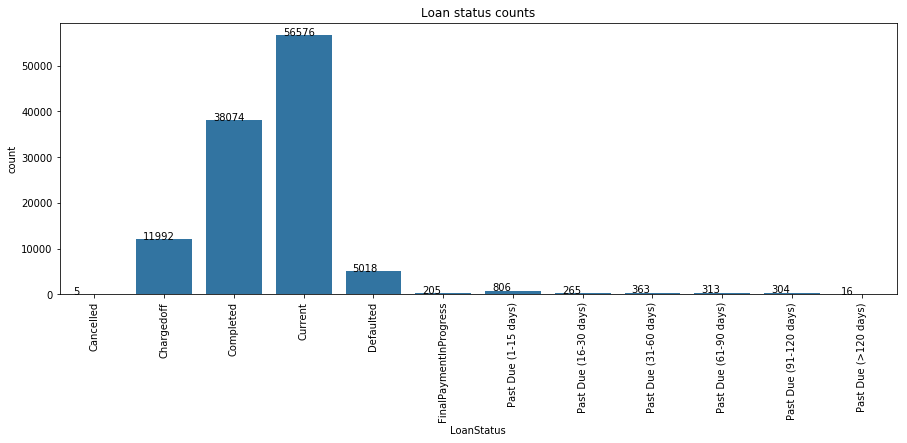

In [9]:
#show the loan statuses 
plt.figure(figsize = [15, 5]) 
base_color = sb.color_palette()[0]
ax=sb.countplot(data= Loans, x='LoanStatus', color= base_color)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation=90)
plt.title('Loan status counts');

**Observation**  
We can see above that a big chunk of the loans are current and followed by completed , chargedoff and defaulted then the rest.It is important to note that there are only 5 cancelled loans, which means out of over 100,000 loans only 5 had not been processed. 

#### Is Borrower APR higher than Borrower rate (Interest rate)?

In [10]:
Loans[['BorrowerAPR', 'BorrowerRate']].describe()

,BorrowerAPR,BorrowerRate
count,113912.000000,113937.000000
mean,0.218828,0.192764
std,0.080364,0.074818
min,0.006530,0.000000
25%,0.156290,0.134000
50%,0.209760,0.184000
75%,0.283810,0.250000
max,0.512290,0.497500


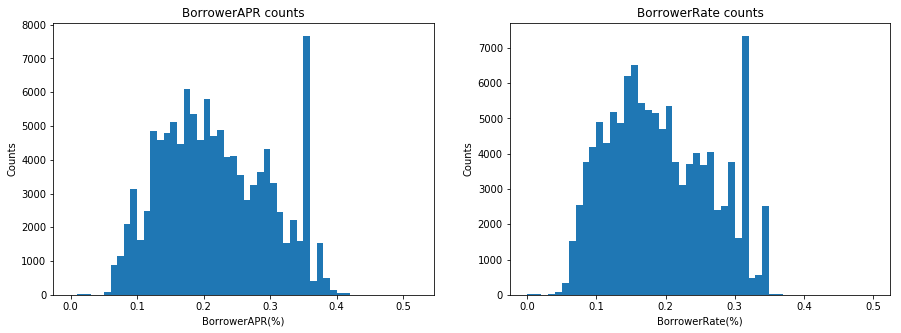

In [11]:
plt.figure(figsize = [15, 5]) 

#since BorrowerAPR contained null values
Loans_sub = Loans[~Loans['BorrowerAPR'].isnull()]

#subplot for borrower annual percentage rate
plt.subplot(1,2,1)
bins= np.arange(0, Loans_sub['BorrowerAPR'].max()+0.01,0.01)
plt.hist(data=Loans_sub, x='BorrowerAPR',bins=bins)
plt.xlabel('BorrowerAPR(%)')
plt.ylabel('Counts')
plt.title('BorrowerAPR counts');

#subplot for borrower rate
plt.subplot(1,2,2)
bins= np.arange(0, Loans_sub['BorrowerRate'].max()+0.01,0.01)
plt.hist(data=Loans_sub, x='BorrowerRate',bins=bins)
plt.xlabel('BorrowerRate(%)')
plt.ylabel('Counts')
plt.title('BorrowerRate counts');

**Observation**  
According to [Investopedia](https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp) interest rate is used when calculating the interest expense on your loan while APR includes not only the interest expense on the loan but also all fees and other costs involved in procuring the loan.  
In the **visualization** above,the visualizations are similar with a slight difference since the APR of a loan is higher than the loan’s interest rate because it considers multiple costs of borrowing.

#### What are the top 3 prosper scores?

In [12]:
Loans.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

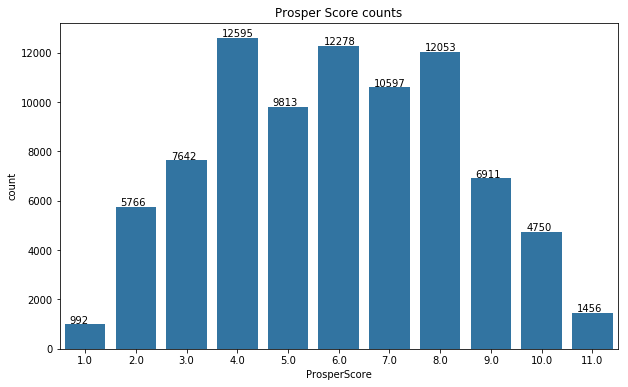

In [13]:
#score ranges from 1-10, with 10 being the best, or lowest risk score. 
plt.figure(figsize = [10,6])
base_color = sb.color_palette()[0]
ax= sb.countplot(data= Loans, x='ProsperScore',color= base_color)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Prosper Score counts');

**Observation**  
According to [Prosper's website](https://www.prosper.com/plp/general-prosper_score/#:~:text=The%20Prosper%20score%20estimates%20the,the%20date%20of%20loan%20origination.), Prosper uses both the custom score and the credit reporting agency score together to assess the borrower’s level of risk and determine estimated loss rates.Prosper score estimates the probability of a loan going “bad,” where “bad” is the probability of going 60+ days past due within the first twelve months from the date of loan origination.Score ranges from 1-10, with 10 being the best, or lowest risk score. The top 3 prosper scores are 4,6 and 8 which makes the graph above multimodal.

#### Which is the highest listing category?
>  0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

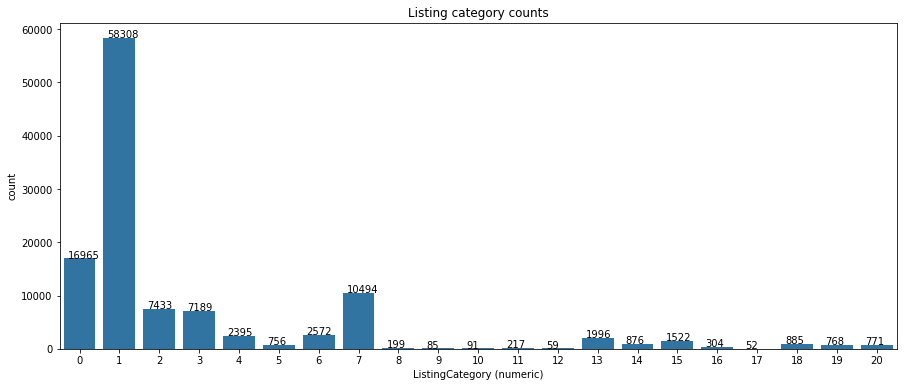

In [14]:
#listing category information
plt.figure(figsize = [15,6])
base_color = sb.color_palette()[0]
ax= sb.countplot(data= Loans, x='ListingCategory (numeric)',color= base_color)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Listing category counts');

**Observation**  
The highest listing category is **Debt Consolidation** this means that most people opt to take a debt consolidation loan which is,when you have lots of different credit commitments and you're struggling to keep up with repayments, you can merge them together into one loan to lower your monthly payments. You borrow enough money to pay off all your current credit commitments and owe money to just one lender.

#### Is the Estimated effective yield multimodal?

In [15]:
Loans_sub['EstimatedEffectiveYield'].describe()

count    84853.000000
mean         0.168661
std          0.068467
min         -0.182700
25%          0.115670
50%          0.161500
75%          0.224300
max          0.319900
Name: EstimatedEffectiveYield, dtype: float64

The mean represented by the dotted line is:
0.17


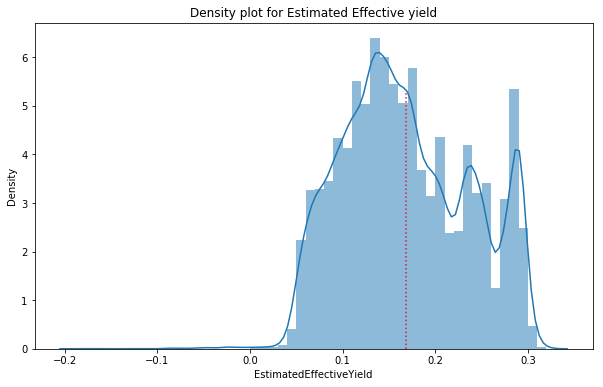

In [16]:
plt.figure(figsize = [10,6])
#since Estimated Effective yield has null values, take the non-null ones
Loans_sub = Loans[~Loans['EstimatedEffectiveYield'].isnull()]

bin_edges = np.arange(0, Loans_sub['EstimatedEffectiveYield'].max()+0.01, 0.01)
ax= sb.distplot(Loans_sub['EstimatedEffectiveYield'], bins = bin_edges, hist_kws = {'alpha' :1/2})

#show the mean line in the KDE
mean = Loans_sub['EstimatedEffectiveYield'].mean()
print ('The mean represented by the dotted line is:')
print("{:.2f}".format(mean))
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
plt.vlines(mean, 0, height, color='crimson', linestyle=':')
plt.title('Density plot for Estimated Effective yield')
plt.ylabel('Density');

**Observation**  
The curve has a multimodal pattern since it has more than two peaks, this shows that there are multiple EstimatedEffectiveYield that are popular. We also note that there are a few customers who have negative EstimatedEffectiveYield.This could mean that their BorrowerRate is a lot lower since Effective yield is usually correlates with the borrower interest rate.

#### Do experienced people take loans more or less ?

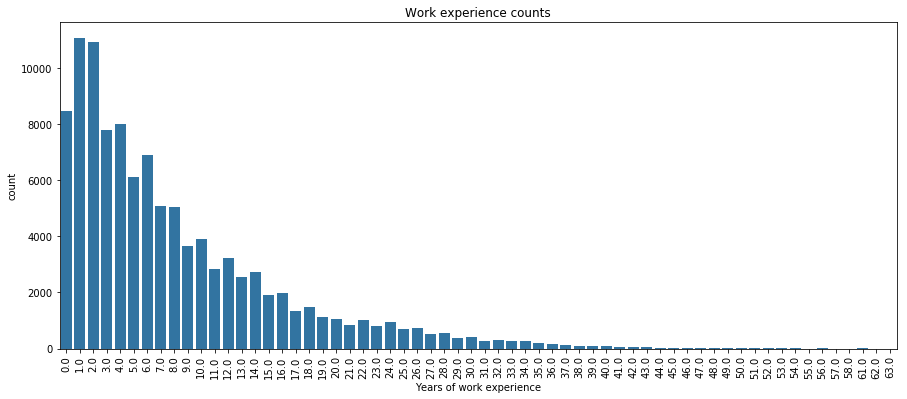

In [17]:
#work experience in years and round off
Loans['WorkExperience']=round(Loans['EmploymentStatusDuration']/12)

#since WorkExperience has null values, take the non-null ones

plt.figure(figsize = [15,6])
ticks= np.arange(0,Loans['WorkExperience'].max()+2,2)
base_color = sb.color_palette()[0]
sb.countplot(data= Loans, x='WorkExperience',color= base_color)
plt.xticks(rotation=90)
plt.xlabel('Years of work experience')
plt.title('Work experience counts');

**Observation**  
As shown above, the more the years of work experience a person has, the lesser they opt for loans

#### Do more home owners take loans ?

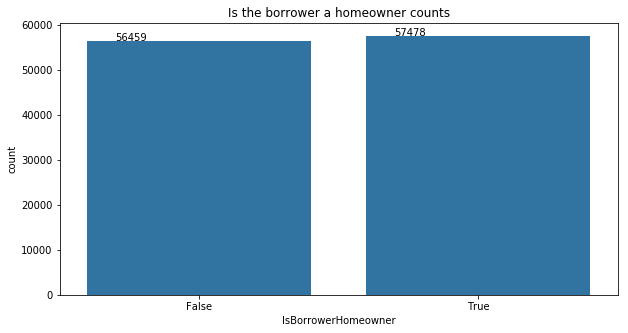

In [18]:
plt.figure(figsize=[10,5])
ax= sb.countplot(data= Loans, x='IsBorrowerHomeowner',color= base_color)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Is the borrower a homeowner counts');

**Observation**  
The number of borrowers who are homeowners is higher.  
The difference between number of borrowers who are home owners and those who aren't is small, thus it does not affect the analysis much.

#### Number of people are borrowing loans per income range

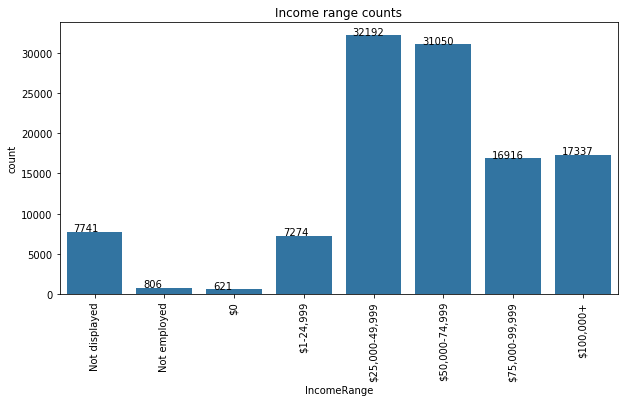

In [19]:
#from the lowest income or no employment to the highest income
income_range= ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

#categories and order
Income = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)

#income range column to  ordered categorical
Loans['IncomeRange'] = Loans['IncomeRange'].astype(Income);

plt.figure(figsize=[10,5])
ax= sb.countplot(data= Loans, x='IncomeRange',color= base_color)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation = 90)
plt.title('Income range counts');

**Observation**  
Highest number of people belong to *25,000-49,999* and *50,000-74,999* income ranges, few people with no income and no employment take loans. Above also shows more people classified as middle class earners take loans compared to anyone else.

**Which state has the most borrowers?**

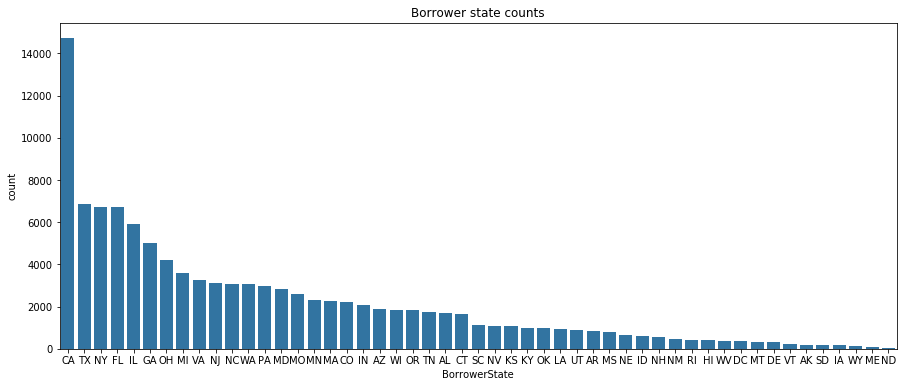

In [20]:
plt.figure(figsize = [15,6])
StateOrder = Loans.BorrowerState.value_counts().index
sb.countplot(data= Loans, x='BorrowerState',color= base_color, order = StateOrder )
plt.title('Borrower state counts');

**Observation**  
The state with the highest number of borrowers is CA which stands for California, this may be due to a high population compared to other states but we do not know that forsure.

#### What status of employments are common among the borrowers?

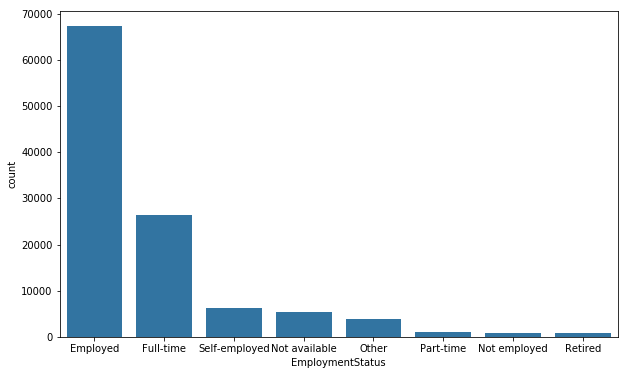

In [21]:
plt.figure(figsize = [10,6])
ES= Loans.EmploymentStatus.value_counts().index
sb.countplot(data= Loans, x='EmploymentStatus',color= base_color, order = ES );

**Observation**  
We can note that people who are have jobs (Employed,Full-time and Self-employed) who we can assume able to pay the loans hence their numbers are higher due to their stable inflow of income that can be deducted every month.The most common employment status is Employed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did not perform any transformation on my variables. For every distribution from my variables of interest there's an observation below to show what I've deduced from every visualization.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I converted the income range to a categorical data type and had to remove null values inorder to plot histograms of borrower APR and Estimated effective yield. Also the variables with the dates needed to be changed to date/time datatypes.

## Bivariate Exploration

#### What does the term imply on loan status?

In [22]:
#show counts of the loanstatus per term
counts = Loans.groupby(['Term', 'LoanStatus']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index = 'Term', columns = 'LoanStatus', values = 'count')
counts

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
Term,,,,,,,,,,,,
12,NaN,72.0,1450.0,62.0,10.0,10.0,3.0,3.0,1.0,2.0,1.0,NaN
36,5.0,10834.0,34200.0,36387.0,4822.0,157.0,553.0,174.0,239.0,205.0,193.0,9.0
60,NaN,1086.0,2424.0,20127.0,186.0,38.0,250.0,88.0,123.0,106.0,110.0,7.0


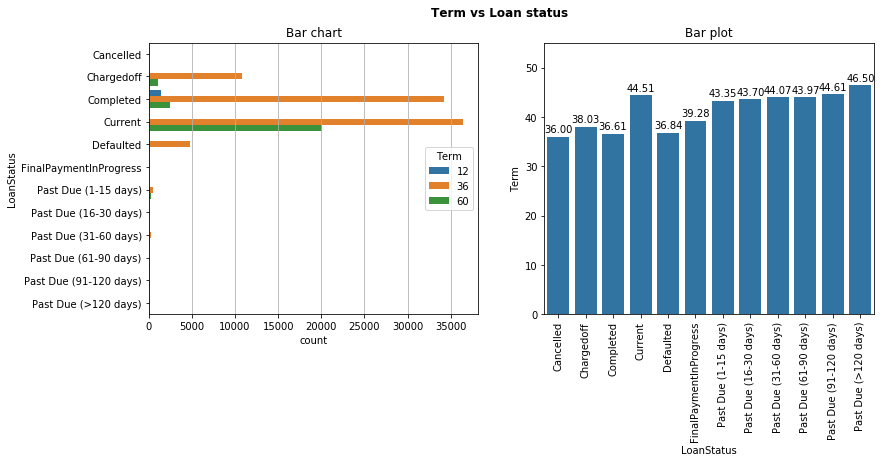

In [23]:
#the visualization of term and loan status
plt.figure(figsize = [13, 5]).suptitle('Term vs Loan status', fontweight='bold')
#clustered bar charts
plt.subplot(1,2,1)
plt.grid(axis="x")
sb.countplot(data = Loans, y = 'LoanStatus', hue= 'Term')
plt.title('Bar chart');

#bar plots
plt.subplot(1,2,2)
plots= sb.barplot(data = Loans, x= 'LoanStatus', y= 'Term', errwidth=0, color=base_color)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')
plt.xticks(rotation = 90)
plt.title('Bar plot');

In [24]:
Loans['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

**Observation**  
According to the countplot 36 months has the most people and most of them have a loan status of current and complete, thus the number of borrowers per loan status is influencing the output. In the bar plot we can note that in most all loan statuses the average is 36 and above which means that alot of people who have taken loans of 36 months and above have fallen in each loan status category.Thus the term does not really affect the loan status.

#### Do lenders get more estimated effective yield if they have a better prosper score?

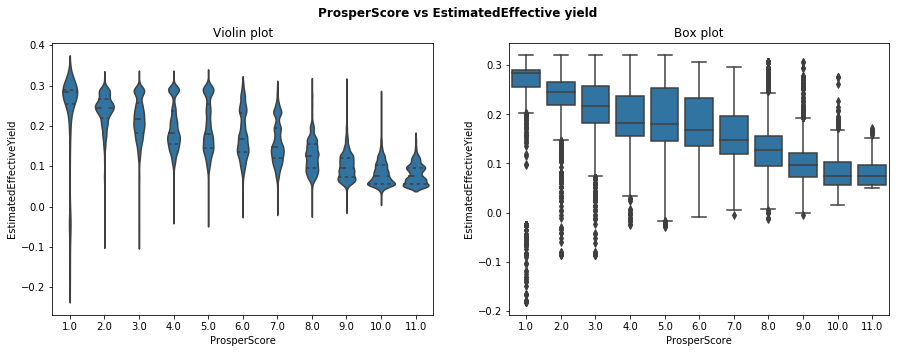

In [25]:
plt.figure(figsize=[15,5]).suptitle('ProsperScore vs EstimatedEffective yield', fontweight='bold')

#violin plots
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.violinplot(data = Loans, x='ProsperScore', y='EstimatedEffectiveYield', color=base_color, inner='quartile')
plt.title('Violin plot');

#boxplot
plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = Loans, x='ProsperScore', y='EstimatedEffectiveYield', color=base_color)
plt.title('Box plot');

**Observation**  
The prosper score shows the risk factor, with 1 being the highest risk. A low prosper score means poor prospects from the borrower while a lower prosper score means better prospects. As shown above, the estimated effective yield is high on low prosper score and steadily decreases(as seen on the median line in the box plot) as it moves to higher prosper scores. This means that the lenders may charge different interest rates to borrowers with low prosper scores compared to borrowers with a high prosper score. A high risk borrower has a higher estimated effective yield.

#### What kind of workers get a good prosper score?

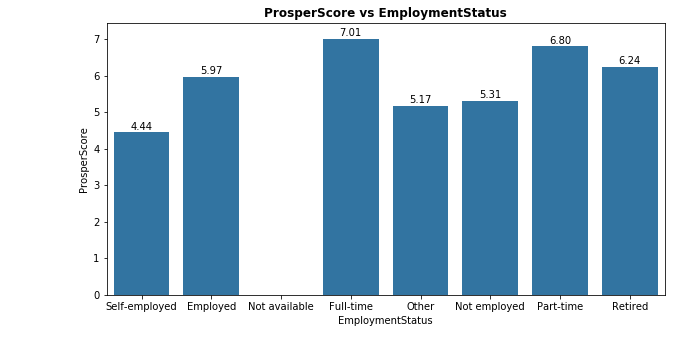

In [26]:
plt.figure(figsize=[10,5])
plots= sb.barplot(data = Loans, x= 'EmploymentStatus', y= 'ProsperScore', errwidth=0, color = base_color)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.title('ProsperScore vs EmploymentStatus', fontweight='bold');

**Observation**  
Full-time workers have an average of 7.01 prosper score rating which makes them the at lowest risk followed by part-time workers, this may be due to their nature of the work that somewhat guarantees ontime loan repayment. Self-employed workers have the highest risk rating , this could be due to the nature of work for example, a self-employed worker may have low sales then they won't be able to repay their loans on time.

#### Do Lenders prefer borrowers with good Prosper Score ?

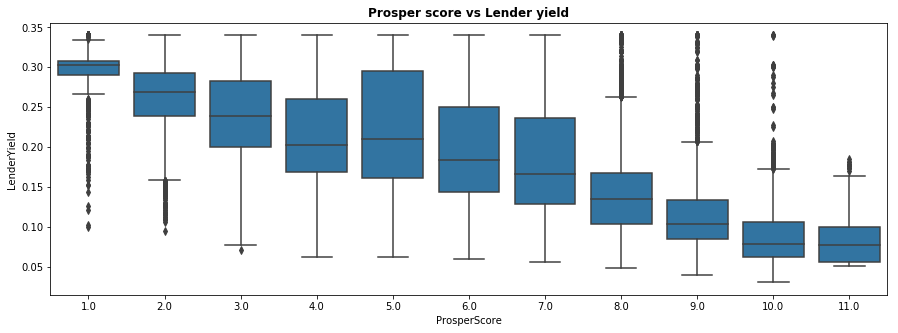

In [27]:
#plot for prosper score against lenderyield
plt.figure(figsize=[15,5])
sb.boxplot(data =Loans ,x='ProsperScore', y= 'LenderYield', color=base_color)
plt.title('Prosper score vs Lender yield', fontweight='bold');

**Observation**  
We can observe that the lower the risk rating(higher the prosper score), the lower the median for the lender yield , this may mean that lenders prefer borrowers with a low prosper score or rather a higher risk rating.

#### What is the correlation between borrower rate and borrower annual percentage rate

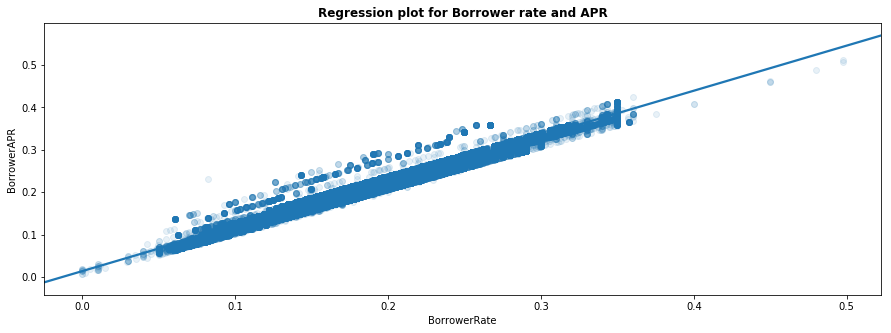

In [28]:
#correlation between borrower APR and rate
plt.figure(figsize=[15,5])
sb.regplot(data=Loans, x='BorrowerRate', y= 'BorrowerAPR',scatter_kws={'alpha':0.1} )
plt.title('Regression plot for Borrower rate and APR', fontweight='bold');

**Observation**  
The correlation is positive, this makes sense because the APR is the rate plus some extra costs, thus as the borrower rate increases then the borrower APR also equally increases.

#### Which listing categories do homeowners and non homeowners fall in?
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

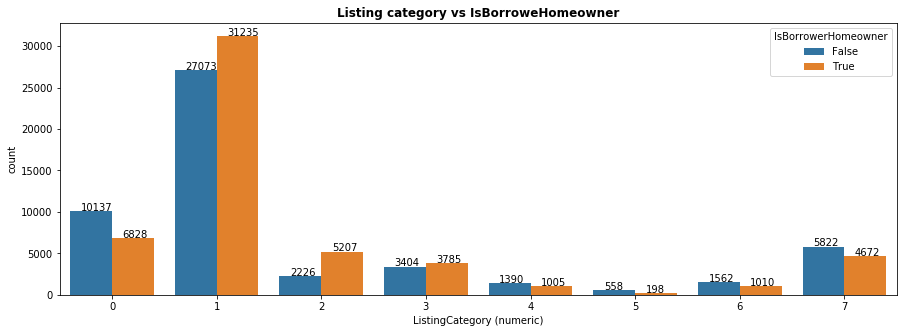

In [29]:
#For this plot, only needs the first 8 listing categories since the rest are unecessary
Listing= Loans.loc[Loans['ListingCategory (numeric)'].isin(['0','1','2','3','4','5','6','7'])]

plt.figure(figsize=[15,5])
ax = sb.countplot(data = Listing, x= 'ListingCategory (numeric)', hue = 'IsBorrowerHomeowner')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Listing category vs IsBorroweHomeowner', fontweight='bold');

**Observation**  
We can observe that majority of the population who are homeowners or not take loans for 1-debt consolidation,it is important to note that there are non-home owners with, 2-home improvement listing category, Home improvements can be as cheap or as expensive as you want and may include everything from replacing cabinet hardware to building an addition.Therefore, theres no reason for non homeowners to have it if they are not owning a house, logically thinking is why would someone renovate a house that is not theirs? could this mean they are taking the loan for someone else? What would be the risk? We can do a **further analysis** for the risk for home owners and non homeowners taking a home improvement loan.

#### What is the trend in prosper scores between home owners and non-home owners

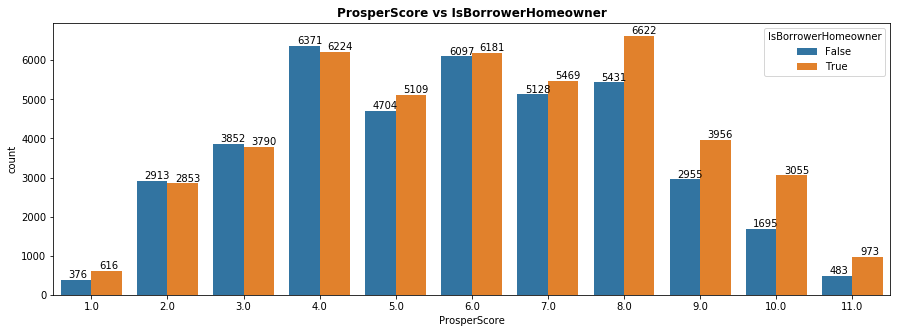

In [30]:
plt.figure(figsize=[15,5])
ax = sb.countplot(data = Loans, x= 'ProsperScore', hue = 'IsBorrowerHomeowner')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('ProsperScore vs IsBorrowerHomeowner', fontweight='bold');

**Observation**  
We can see from above that for prosper scores greater than and equals to 5, the number of home owners is higher which means more home owners have a higher prosper score meaning they are low risk. While the prosper scores less than 5 the number of non-homeowners is higher than that of the home owners which means the non-homeowners have more low prosper scores which means that they are high risk. This could mean that homeowners are low risk because they can put their property as leverage incase they default in paying the loans.

#### What is the correlation between the AvailableBankcardCredit and BorrowerRate?

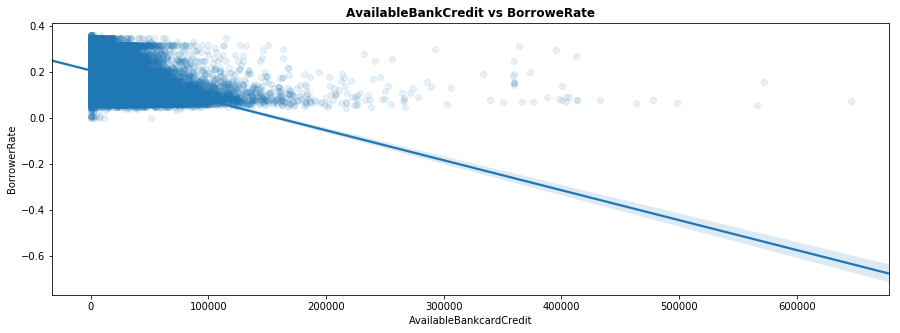

In [31]:
plt.figure(figsize=[15,5])
sb.regplot(data=Loans, x= 'AvailableBankcardCredit', y='BorrowerRate',scatter_kws={'alpha':0.1} )
plt.title('AvailableBankCredit vs BorroweRate', fontweight='bold');

**Observation**  
According to [Investopedia](https://www.investopedia.com/terms/a/available-credit.asp#:~:text=Available%20credit%20is%20related%20to,credit%20limit%20on%20the%20account.), Available credit is related to the account balance of a credit card or other form of debt. Available credit refers to how much a borrower has left to spend; this amount can be calculated by subtracting the borrower's purchases (and the interest on those purchases) from the total credit limit on the account. The credit limit is the total amount that can be borrowed. AvailableBankcardCredit can be an indicator to the borrowers credit history. The plot above shows a negative correlation, in that the AvailableBankcardCredit increases as the borrower rate decreases. This means that people with a low AvailableBankcardCredit are charged higher interests compared to people with higher AvailableBankcardCredit. Since rate and APR are positively correlated, this plot also applies to the borrower APR

#### Do lenders charge borrowers a lower or higher rate depending on their risk rating?

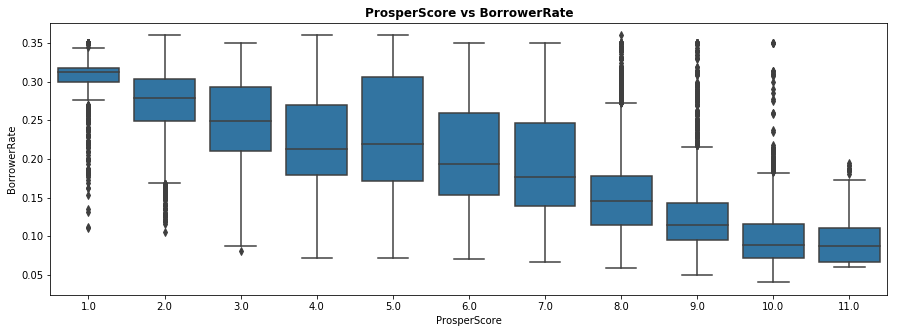

In [32]:
#plot for borrower rate vs prosper score
plt.figure(figsize=[15,5])
sb.boxplot(data=Loans, x= 'ProsperScore', y='BorrowerRate',color=base_color)
plt.title('ProsperScore vs BorrowerRate', fontweight='bold');

**Observation**  
As the prosper score increases the borrower rate decreases in the median range,this shows that low risk borrowers have a low intererest rate compared to high risk borrowers. It is important to note that there are outliers above Q3 in prospers scores 8-10 which also means there are low risk borrowers with higher borrower rates and 1&2 has outliers below Q1. Overally, as prosper score improves, the interest rate decreases. This proves that lenders charge a lower rate to borrowers who have a good prosper score, thus the lower risk a borrower is the lower the interest rate.

#### Do borrowers with longer terms take bigger loans?

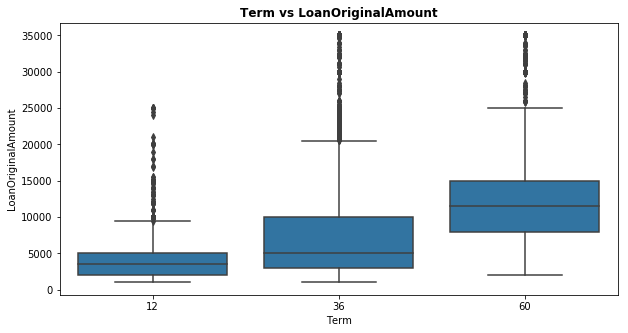

In [33]:
plt.figure(figsize= [10,5])
sb.boxplot(data = Loans, x='Term', y='LoanOriginalAmount', color=base_color)
plt.title('Term vs LoanOriginalAmount', fontweight='bold');

**Observation**  
According to the plot above the median line goes higher for the longer terms and each of them have outliers above Q3. This shows that the longer the term then the higher the loan the borrower will take,it may mean that borrowers wouldn't want a big loan that they would have to pay back in a short amount of time.

#### What is the range of the percentage of defaulted loans per year ?

In [34]:
#create a column called loan year
Loans['LoanYear'] = pd.DatetimeIndex(Loans['LoanOriginationDate']).year

In [35]:
#only get the defaulted loans
Defaulted= Loans.loc[Loans['LoanStatus'].isin(['Defaulted'])]

DefaultCounts= Defaulted.groupby(['LoanYear', 'LoanStatus']).size()

#find the counts for defaulted loans per year, there are 113,937 loans in this dataset
DefaultCounts=DefaultCounts.reset_index(name='LoanCount')

#Create new data frame for %defaults per year
df_d= pd.DataFrame(DefaultCounts)
df_d= df_d.drop(['LoanStatus'], axis=1) #drop the loanstatus column

# find the total loans per year
Years = Loans['LoanYear'].value_counts()
YearCounts=Years.reset_index(name='TotalPerYear')
YearCounts.rename(columns = {'index':'LoanYear'}, inplace = True)

#merge the two dataframes df_d and YearCounts
df_merged = pd.merge(df_d,YearCounts, on='LoanYear')

#create new column for the percentage defaulted
df_merged['% Defaulted'] = (df_merged['LoanCount']*100)/df_merged['TotalPerYear'] 

#drop the LoanCount and Totalper year column
df_merged = df_merged.drop(['LoanCount', 'TotalPerYear'], axis=1)

#set index as loan year for easier plotting of the line
df_merged = df_merged.set_index('LoanYear')

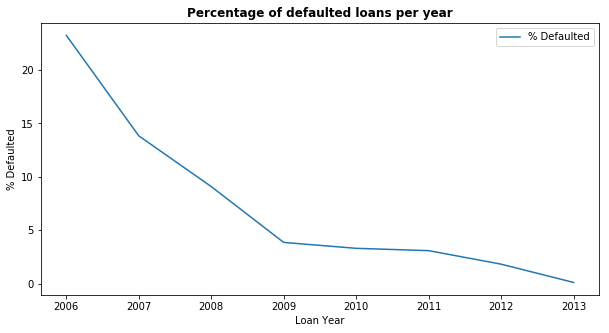

In [36]:
#create line plot to show the defaults
df_merged.plot.line(figsize=[10,5])
plt.title('Percentage of defaulted loans per year', fontweight='bold')
plt.xlabel('Loan Year')
plt.ylabel('% Defaulted');

**Observation**  
The defaulted loans are from 2006-2013 as as shown in the plot above, we can note that the defaulted loans are high between 2006-2008 then continues to drop till 2009. It then plateaus till 2011 then continues to fall. 

#### Which year made the highest losses after recoveries were collected?

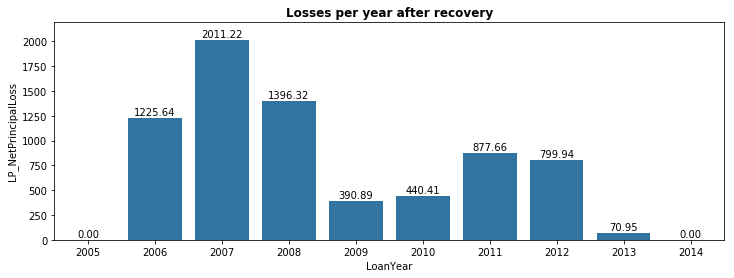

In [37]:
plt.figure(figsize= [12,4])
plots= sb.barplot(data = Loans, x= 'LoanYear', y= 'LP_NetPrincipalLoss', errwidth=0, color = base_color)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Losses per year after recovery', fontweight='bold');

**Observation**  
LP_NetPrincipalLoss is the principal that remains uncollected after any recoveries. In the bar plot above we can note that 2007 had the highest Net principalloss

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can note that borrower rate varies when it comes to prosper score and bank credit. There is an observation below each visualization to give further information.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The percentage of defaulted loans per year continually dropped, there is no specific reason that could cause this to happen, further investigation is definitely required.

## Multivariate Exploration

#### What is the difference in borrower rate and prosper scores for homeowners and non-homeowners?

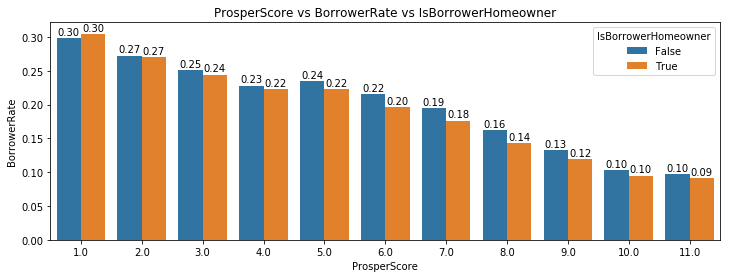

In [38]:
plt.figure(figsize= [12,4])
plots = sb.barplot(data = Loans, x= 'ProsperScore',y= 'BorrowerRate', hue = 'IsBorrowerHomeowner', errwidth=0)
#annotate the bar plots
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.title('ProsperScore vs BorrowerRate vs IsBorrowerHomeowner');

**Observation**  
From previous observations as the prosper score increases the borrower rate decreases meaning low risk borrowers have lower interest rates. This observation remains true as shown above. There is only a slight difference if the borrower is a home owner or not, thus showing that this does not affect the borrower rate in any significant way. Thus the only thing notably affecting the borrower rate is the prosper score since it decreases as the prosper score increases.


#### EmploymentStatus vs ProsperScore vs IsBorrowerHomeowner

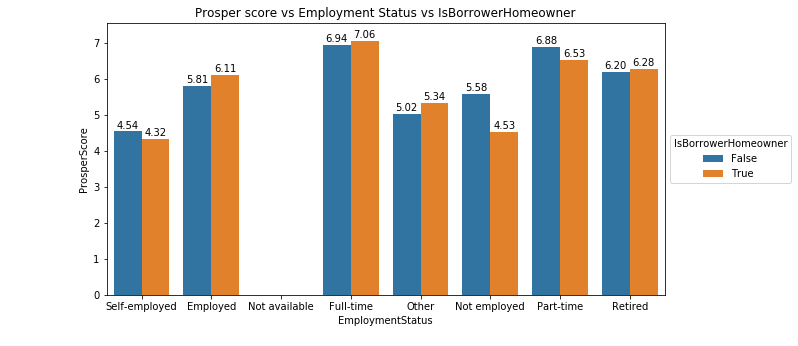

In [39]:
plt.figure(figsize= [10,5])
plots= sb.barplot(data = Loans,x= 'EmploymentStatus', y= 'ProsperScore', hue = 'IsBorrowerHomeowner', errwidth=0)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Prosper score vs Employment Status vs IsBorrowerHomeowner')
plt.xlabel('EmploymentStatus')
#legend positioning
plt.legend(loc=6, bbox_to_anchor=(1.0,0.5)).set_title('IsBorrowerHomeowner');


**Observation**  
Borrowers who have their employment status as employed, full-time, part-time and retired generally have a high prosper score. Though the difference between a homeowner and a non-homeowner's prosper scores are not significant. The not employed status, the prosper score for a non homeowner is higher which is odd since you'd expect the bank to have the homeowners property as collateral thus should their prosper score higher. The not available option shows that everyone in one way or the other has stated their employment status.

#### What is the correlation of borrower rate with other numeric variables?

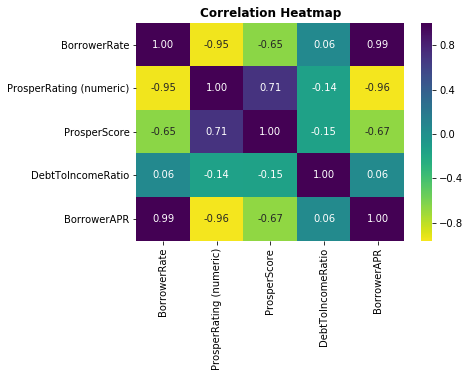

In [40]:
#heatmap plot
sb.heatmap(Loans[['BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'DebtToIncomeRatio','BorrowerAPR']].corr(),
           annot = True, fmt = '.2f', cmap = 'viridis_r', center = 0)
plt.title('Correlation Heatmap', fontweight='bold');

**Observation**  
Prosper rating is highly negatively correlated with borrower rate which means an increase in borrower rate results in a decrease in prosper rating and vice versa.
Borrower rate and borrower APR are highly positively correlated, this is expected from the other observations previously done which means an increase in one leads to an increase in the other.
The debt to income ratio does not correlate in any way with all the numeric variables shown above.

#### What is the range on LoanOriginal amount based on ProsperScore and BorrowerRate?

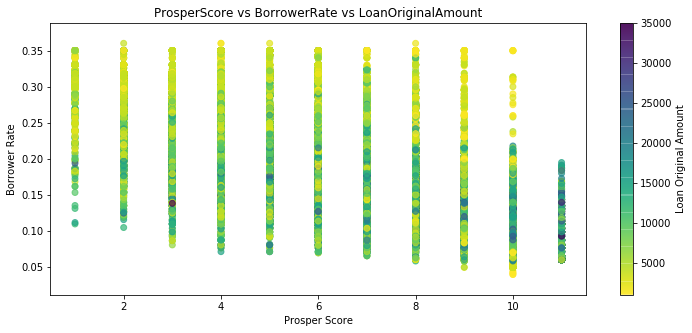

In [41]:
plt.figure(figsize= [12,5])

#scatter plot
plt.scatter (data=Loans, x='ProsperScore', y='BorrowerRate',c = 'LoanOriginalAmount', cmap='viridis_r', alpha = 0.7)

#labels
plt.colorbar(label = 'Loan Original Amount')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate')
plt.title('ProsperScore vs BorrowerRate vs LoanOriginalAmount');

**Observation**  
We can note that most loan original amounts are less than 20,000 dollars and they mostly belong to those with a low prosper score meaning the highrisk borrowers. The higher the prosper score the more the bluish intensity meaning the higher the loan original amount. We can also note that lower loan original amounts have a higher borrower rate.

#### How does the borrower rate vary for homeowners and non homeowners from year to year?

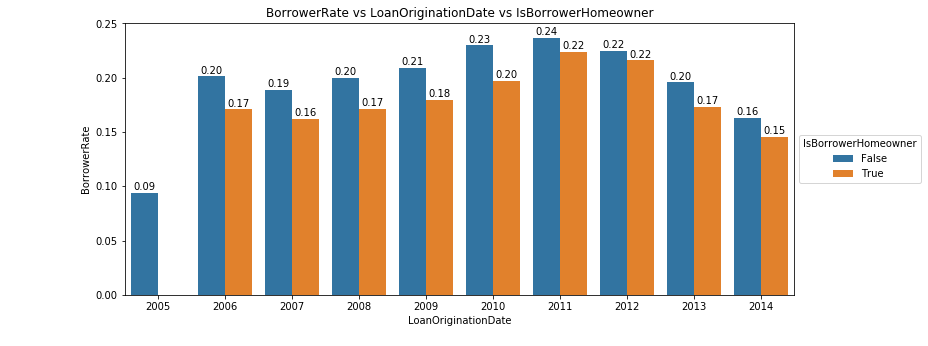

In [42]:
plt.figure(figsize= [12,5])
plots= sb.barplot(data = Loans,x= Loans['LoanOriginationDate'].dt.year, y= 'BorrowerRate', hue = 'IsBorrowerHomeowner', errwidth=0)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.title('BorrowerRate vs LoanOriginationDate vs IsBorrowerHomeowner')
plt.legend(loc=6, bbox_to_anchor=(1.0,0.5)).set_title('IsBorrowerHomeowner');

**Observation**  
All non homeowners have a higher borrower rate each year except 2012, this can be attributed to the fact that they dont have homes, since they have no collateral or mortgage to pay, so maybe the lenders are more considerate of that. We can also note that in 2005, there was no borrower rate for homeowners maybe because of the fact that no homeowners had been recorded at the time.

#### What is the correlation between Borrower APR and Lender yield , how does the prosper score compare? 

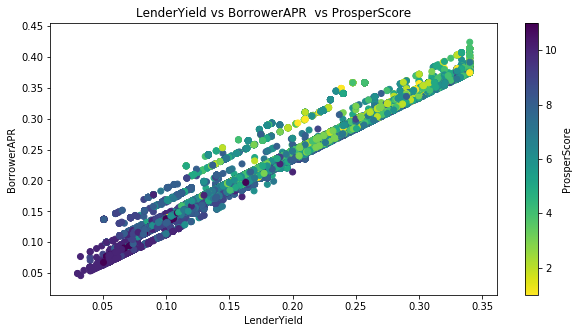

In [43]:
# LenderYield vs Borrower APR  vs ProsperScore
plt.figure(figsize = [10, 5])

plt.scatter(data=Loans,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')

plt.colorbar(label = 'ProsperScore')
plt.title('LenderYield vs BorrowerAPR  vs ProsperScore')
plt.xlabel('LenderYield')
plt.ylabel('BorrowerAPR');

**Observaton**  
We can see that the relationship between the Borrower APR and Lender yield are positively correlated. This means that as the borrower rate increases then the lender yield also increases. It is important to note that the higher the prosper score the lower the lender yield and borrower APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Borrower APR and Lender yeld go hand in hand and by assumption also Borrower APR correlates with them positively but on the other hand there's a negative correlation with prosper scores for all the variables previously mentioned. Below every visualization there's an observation for each feature.

### Were there any interesting or surprising interactions between features?

> Yes, the interaction between prosper score, borrower rate and loan original amount. As the borrower rate increases the loan amount decreases and as the prosper score increases the loan amount increases.

## Conclusions
> From each exploration step, I have noted that there's a high negative correlation between the prosper score and the borrower rate & borrower APR.